In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect("../data/checking-logs.sqlite")

In [3]:
sql = """SELECT substr(datetime,0,11) as date,
                count(datetime)
           FROM pageviews
          WHERE uid LIKE 'user_%'
       GROUP BY substr(datetime,0,11);"""
pageviews = pd.read_sql(sql, conn, parse_dates=['datetime'])
pageviews = pageviews.set_index('date')


In [4]:
sql = """SELECT DISTINCT substr(timestamp,0,11) as date,
                count(timestamp)
           FROM checker c
           JOIN (SELECT DISTINCT substr(datetime,0,11) datetime FROM pageviews
                 WHERE uid LIKE 'user_%') p
             ON substr(timestamp,0,11) = datetime
          WHERE uid LIKE 'user_%' 
       GROUP BY substr(timestamp,0,11);"""
checker = pd.read_sql(sql, conn, parse_dates=['timestamp'])
checker = checker.set_index('date')
checker.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 2020-04-17 to 2020-05-21
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   count(timestamp)  32 non-null     int64
dtypes: int64(1)
memory usage: 512.0+ bytes


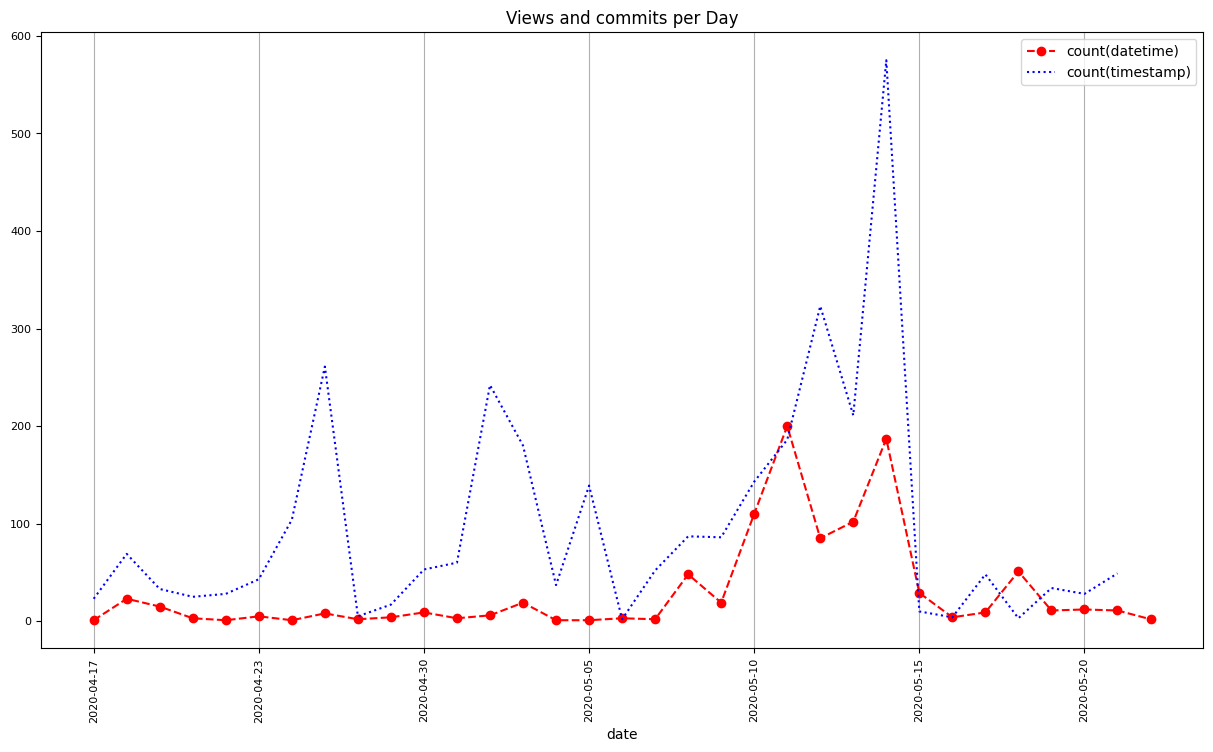

In [5]:
ax = pageviews.plot(
    kind='line',
    linestyle='--',
    figsize=(15, 8),
    fontsize = 8,
    title='Views and commits per Day',
    rot = 90,
    color='red',
    marker='o',
    label='views'
)
checker.plot(
    ax=ax,
    kind='line',
    linestyle=':',
    figsize=(15, 8),
    fontsize = 8,
    title='Views and commits per Day',
    rot = 90,
    color='blue',
    label='commits'
)
ax.xaxis.grid(True)

In [6]:
conn.close()